The Data
We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal:
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data_info = pd.read_csv('../input/lending-club-data/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
def info(name):
    print(data_info.loc[name]['Description'])

In [5]:
info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [6]:
df = pd.read_csv('../input/lending-club-data/lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis
## OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data



<AxesSubplot:xlabel='loan_status', ylabel='count'>

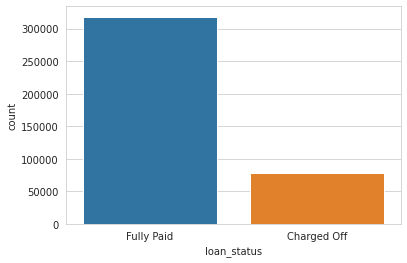

In [9]:
sns.countplot(x='loan_status', data =df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

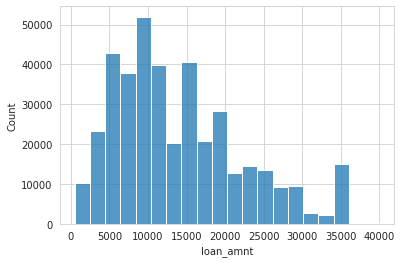

In [10]:
sns.histplot(x='loan_amnt', data =df, bins=20)

 Let's explore correlation between the continuous feature variables

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

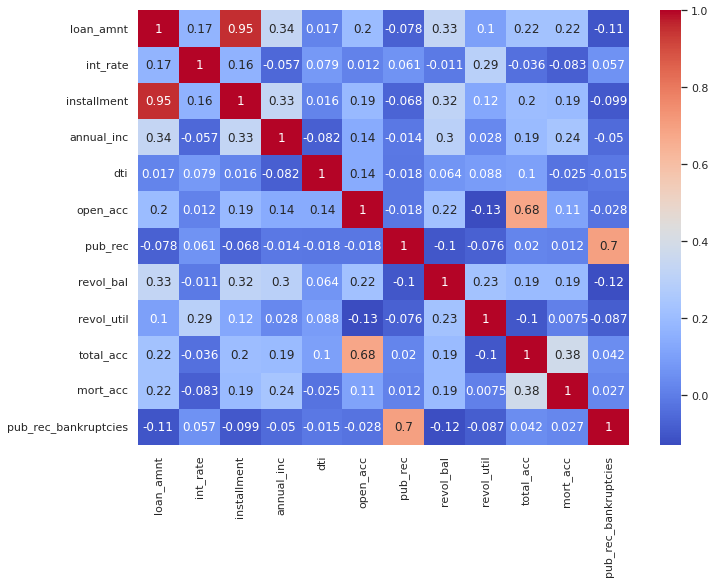

In [12]:
sns.set(rc={'figure.figsize':(11,8)})

sns.heatmap(data = df.corr(), annot=True, cmap='coolwarm')

In [13]:
info('loan_amnt')
info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

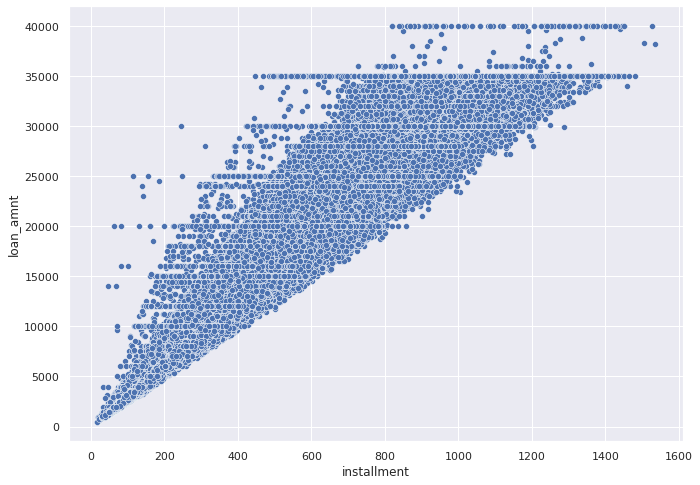

In [14]:
sns.scatterplot(x= 'installment', y= 'loan_amnt', data=df)

In [15]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

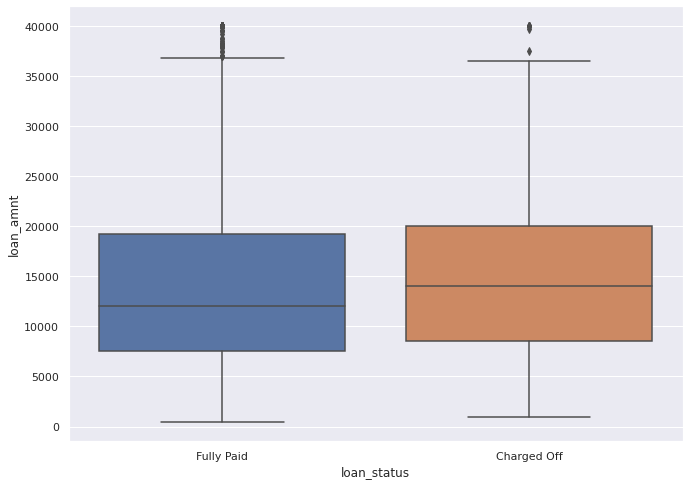

In [16]:
sns.boxplot(x= 'loan_status', y='loan_amnt', data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

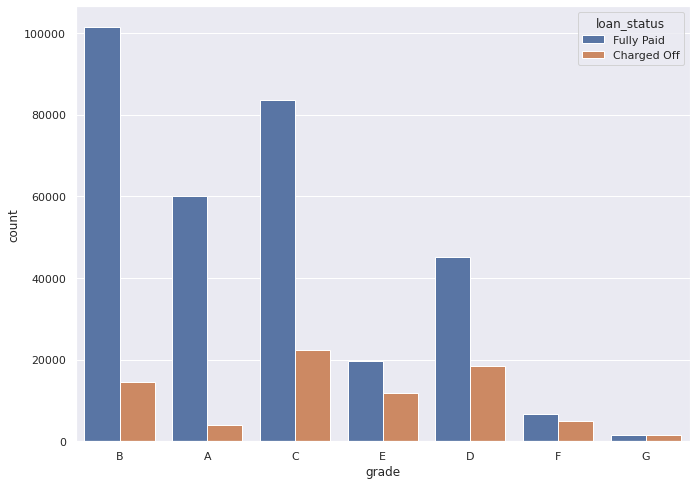

In [20]:
sns.countplot(x= 'grade', data=df, hue='loan_status')

In [21]:
df.groupby('grade')['loan_status'].value_counts()

grade  loan_status
A      Fully Paid      60151
       Charged Off      4036
B      Fully Paid     101431
       Charged Off     14587
C      Fully Paid      83538
       Charged Off     22449
D      Fully Paid      45186
       Charged Off     18338
E      Fully Paid      19723
       Charged Off     11765
F      Fully Paid       6735
       Charged Off      5037
G      Fully Paid       1593
       Charged Off      1461
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

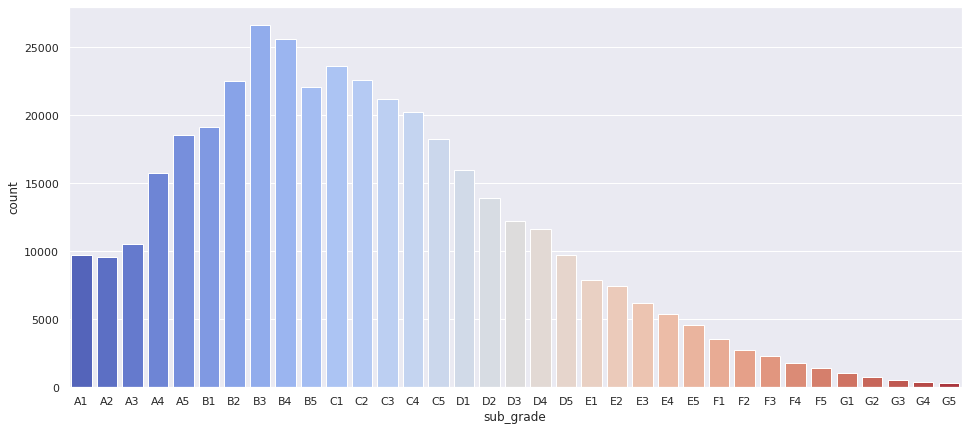

In [22]:
sns.set(rc={'figure.figsize':(16,7)})

sns.countplot(x='sub_grade',data=df,palette='coolwarm', order=sorted(df['sub_grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

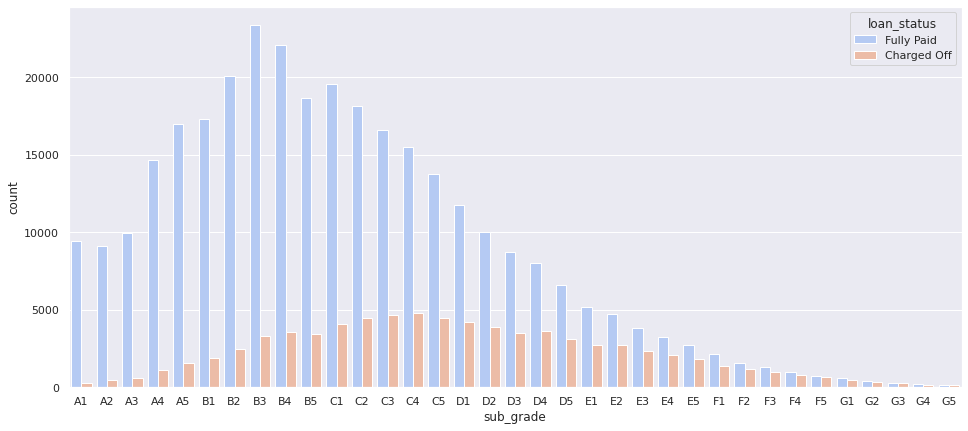

In [23]:
sns.countplot(x='sub_grade',data=df,palette='coolwarm',hue='loan_status', order=sorted(df['sub_grade'].unique()))

In [24]:
df_f_g = df[(df['grade']=='F')| (df['grade']=='G')]


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

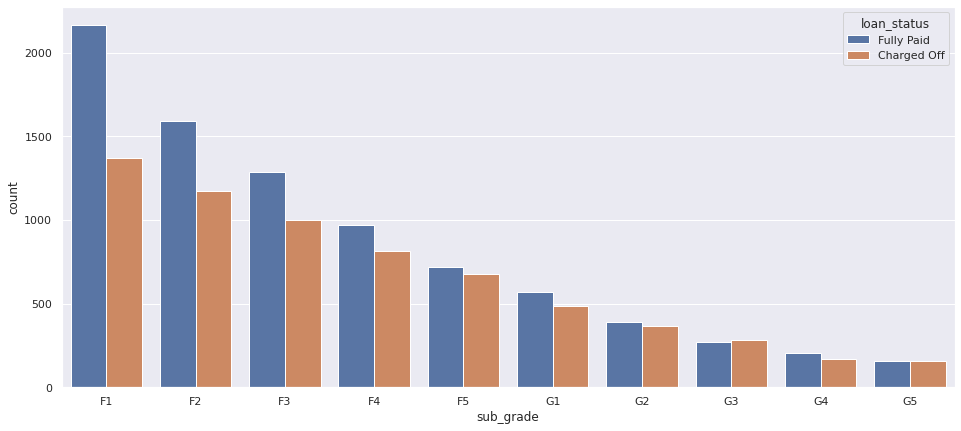

In [25]:
sns.countplot(x='sub_grade', data= df_f_g,hue='loan_status', order= sorted(df_f_g['sub_grade'].unique()))

In [26]:
def loan(status):
    if status== 'Fully Paid':
        return 1
    else:
        return 0

In [27]:
df['loan_repaid'] = df['loan_status'].apply(loan)

In [28]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


<AxesSubplot:>

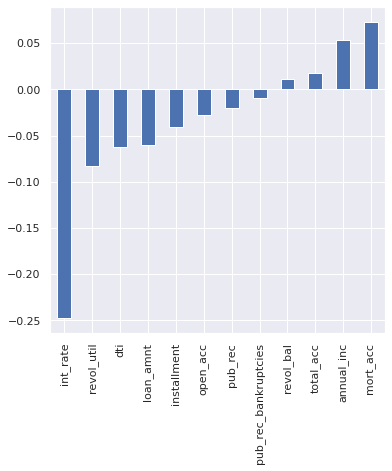

In [29]:
plt.figure(figsize=(6,6))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Section 2: Data PreProcessing(Data Engineering)

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [30]:
len(df)

396030

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [32]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [33]:
info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [34]:
info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [35]:
df['emp_title'].nunique()

173105

In [36]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

 Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [37]:
df = df.drop('emp_title', axis=1)

In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
order=[
'< 1 year',
'1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

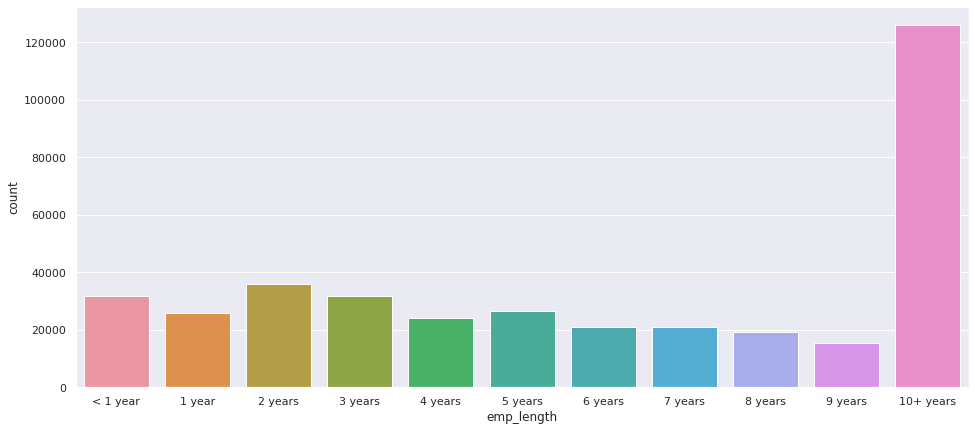

In [40]:
sns.countplot(x= 'emp_length', data=df , order = order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

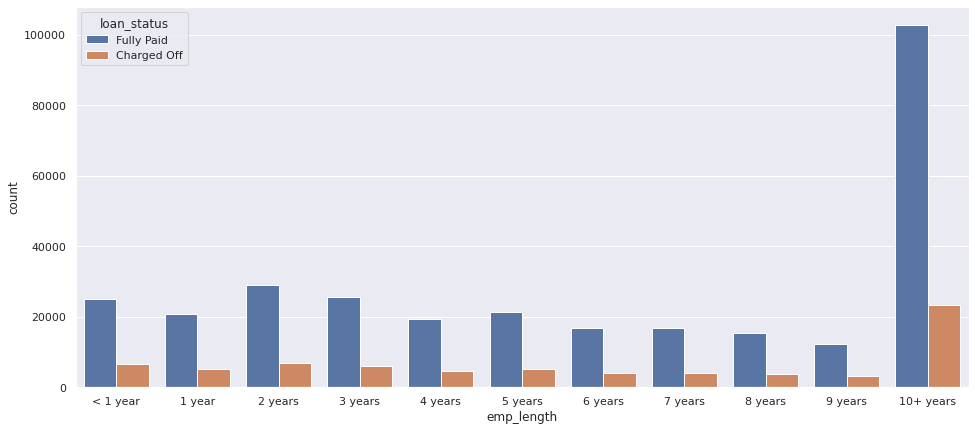

In [41]:
sns.countplot(x= 'emp_length', data=df , order = order,hue='loan_status')

In [42]:
df.groupby('emp_length')['loan_status'].value_counts()

emp_length  loan_status
1 year      Fully Paid      20728
            Charged Off      5154
10+ years   Fully Paid     102826
            Charged Off     23215
2 years     Fully Paid      28903
            Charged Off      6924
3 years     Fully Paid      25483
            Charged Off      6182
4 years     Fully Paid      19344
            Charged Off      4608
5 years     Fully Paid      21403
            Charged Off      5092
6 years     Fully Paid      16898
            Charged Off      3943
7 years     Fully Paid      16764
            Charged Off      4055
8 years     Fully Paid      15339
            Charged Off      3829
9 years     Fully Paid      12244
            Charged Off      3070
< 1 year    Fully Paid      25162
            Charged Off      6563
Name: loan_status, dtype: int64

In [43]:
emp_charged_off = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()

In [44]:
emp_fully_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()

In [45]:
emp_charged_off

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [46]:
emp_fully_paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [47]:
emp_length = emp_charged_off/emp_fully_paid

In [48]:
emp_length

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

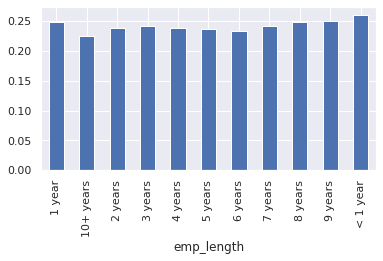

In [49]:
plt.figure(figsize=(6,3))

emp_length.plot(kind='bar')

 Charge off rates are extremely similar across all employment lengths. drop the emp_length column.

In [50]:
df = df.drop('emp_length', axis=1)

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [52]:
info('title')
info('purpose')

The loan title provided by the borrower
A category provided by the borrower for the loan request. 


In [53]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [54]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

 The title column is simply a string description of the purpose column. We can drop it

In [55]:
df= df.drop('title', axis=1)

In [56]:
info('mort_acc')

Number of mortgage accounts.


In [57]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [58]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

 Looks like the total_acc feature correlates with the mort_acc

In [59]:
total_avg= df.groupby('total_acc')['mort_acc'].mean()

In [60]:
total_avg[2]

0.0

In [61]:
def function(mort,total):
    if np.isnan(mort):
        return total_avg[total]
    else:
        return mort

In [62]:
df['mort_acc']= df.apply(lambda x : function(x['mort_acc'], x['total_acc']),axis=1)

In [63]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.

In [64]:
df = df.dropna()

In [65]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables


In [66]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [67]:
df['term'][4]

' 60 months'

In [68]:
def term(months):
    if months == ' 36 months':
        return 36
    else:
        return 60
    

In [69]:
df['term'] = df['term'].apply(term)

In [70]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [71]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [72]:
df = df.drop('grade', axis=1)

We already know grade is part of sub_grade, so just drop the grade feature.

In [73]:
subgrade_dummy = pd.get_dummies(df['sub_grade'], drop_first=True)

In [74]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummy], axis=1)

In [75]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [77]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [78]:
df = pd.concat([df.drop( ['verification_status', 'application_type','initial_list_status','purpose'],axis=1), dummies],axis=1)

In [79]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df.select_dtypes('object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [81]:
df.value_counts('home_ownership')

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
dtype: int64

In [82]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [83]:
df.value_counts('home_ownership')

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
dtype: int64

In [84]:
owner_dummy = pd.get_dummies(df['home_ownership'], drop_first=True)

In [85]:
df = pd.concat([df,owner_dummy], axis=1)

In [86]:
df = df.drop('home_ownership', axis=1)

In [87]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

 extracts the zip code from the address column:

In [88]:
df['address'][1][-5:]

'05113'

In [89]:
df['zip_code']= df['address'].apply(lambda x : int(x[-5:]))

In [90]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [91]:
zip_dummy = pd.get_dummies(df['zip_code'], drop_first=True)

In [92]:
df = pd.concat([df,zip_dummy],axis=1)

In [93]:
df = df.drop(['zip_code','address'], axis=1)

In [94]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

drop issue_date since we wouldn't know beforehand whether or not a loan would be issued when using our model

In [95]:
df = df.drop('issue_d', axis=1)

In [96]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

Extract the year from this

In [97]:
df['earliest_cr_year']= df['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [98]:
df = df.drop('earliest_cr_line',axis=1)

In [99]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [100]:
df = df.drop('loan_status', axis=1)

## Train Test Split


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


## Normalizing the Data


In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
X_train = scaler.fit_transform(X_train)

In [107]:
X_test = scaler.transform(X_test)

# Creating the Model


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [109]:
X_train.shape

(316175, 78)

In [110]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

# Final output node for prediction
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy') 

2022-07-27 15:49:27.667084: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [111]:
from tensorflow.keras.callbacks import EarlyStopping


In [112]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=25)

In [113]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test) ,batch_size= 128,epochs=400,
         callbacks=[early_stop])

2022-07-27 15:49:28.396613: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
2471/2471 [==============================] - 9s 3ms/step - loss: 0.3198 - val_loss: 0.2668
Epoch 2/400
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2705 - val_loss: 0.2650
Epoch 3/400
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2673 - val_loss: 0.2651
Epoch 4/400
2471/2471 [==============================] - 9s 4ms/step - loss: 0.2662 - val_loss: 0.2647
Epoch 5/400
2471/2471 [==============================] - 9s 4ms/step - loss: 0.2656 - val_loss: 0.2646
Epoch 6/400
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2650 - val_loss: 0.2640
Epoch 7/400
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2651 - val_loss: 0.2639
Epoch 8/400
2471/2471 [==============================] - 8s 3ms/step - loss: 0.2646 - val_loss: 0.2632
Epoch 9/400
2471/2471 [==============================] - 9s 4ms/step - loss: 0.2644 - val_loss: 0.2642
Epoch 10/400
2471/2471 [==============================] - 8s 3ms/step - l

In [114]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

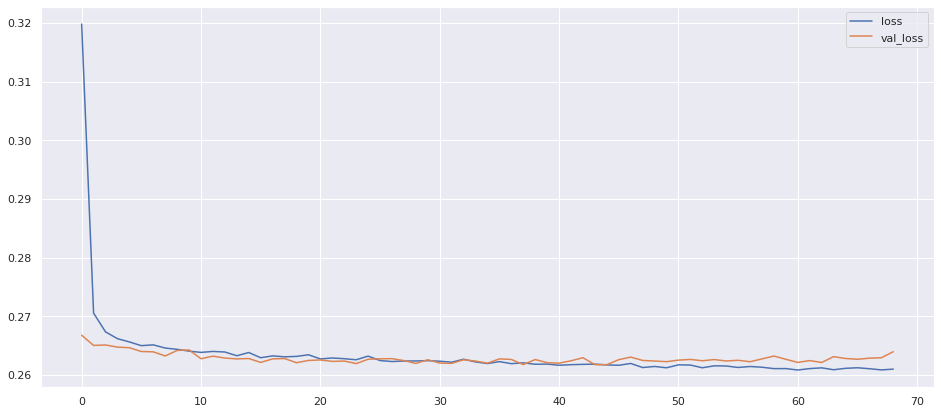

In [115]:
losses.plot()

In [116]:
from tensorflow.keras.models import load_model

In [117]:
model.save('full_data_project_model.h5')  

In [118]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [121]:
confusion_matrix(y_test,predictions)

array([[ 6723,  8935],
       [    1, 63385]])

## Testing the model:
### Given the customer below, would you offer this person a loan?

In [122]:
import random
random.seed(111)
random_ind = random.randint(0,len(df))

new1_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new1_customer

loan_amnt            25000.00
term                    60.00
int_rate                10.99
installment            543.44
annual_inc          150000.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      2000.00
Name: 111762, Length: 78, dtype: float64

In [123]:
new1_customer=scaler.transform(new1_customer.values.reshape(-1, 78))

In [124]:
(model.predict(new1_customer) > 0.5).astype("int32")

array([[1]], dtype=int32)

####  did this person actually end up paying back their loan?

In [125]:
df.iloc[random_ind]['loan_repaid']

1.0